<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_ML_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

---
---

# MISSION 1 : Regression Trees

In [134]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt

In [135]:
data = sns.load_dataset("mpg")

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [136]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [137]:
data.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [138]:
# EXERCICE 1
# INSERT CODE HERE

data.dropna(inplace=True)
data.drop(columns=['name'], inplace=True)
data['origin'] = data.origin.apply(lambda x: 0 if x.lower()=='usa' else 1 if x.lower()=='japan' else 2)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


---

# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [139]:
# Exercice 2
# INSERT CODE HERE
columns = list(data.columns.values)
columns.remove('mpg')

X = data[columns]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

---

# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [140]:
# Exercice 3
# INSERT CODE HERE
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor()

---

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [141]:
# Exercice 4
# INSERT CODE HERE
y_predict = modelDTR.predict(X_test)
df_result = pd.DataFrame({'real': y_test, 'predict': y_predict})
df_result

,real,predict
79,26.0,23.0
276,21.6,20.0
248,36.1,31.0
56,26.0,33.0
393,27.0,27.0
...,...,...
366,17.6,20.5
83,28.0,24.0
115,15.0,13.0
3,16.0,18.0


---

# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [142]:
# Exercice 5
# INSERT CODE HERE
r2_score(y_test, y_predict)

0.7598907442318537

---

# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [143]:
# Exercice 6
# INSERT CODE HERE

df_features_importance = pd.DataFrame({'columns':X_train.columns, 'importance %': modelDTR.feature_importances_*100})

df_features_importance

,columns,importance %
0,cylinders,0.239315
1,displacement,63.154606
2,horsepower,17.000954
3,weight,6.029221
4,acceleration,2.581133
5,model_year,10.417647
6,origin,0.577125


---

# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

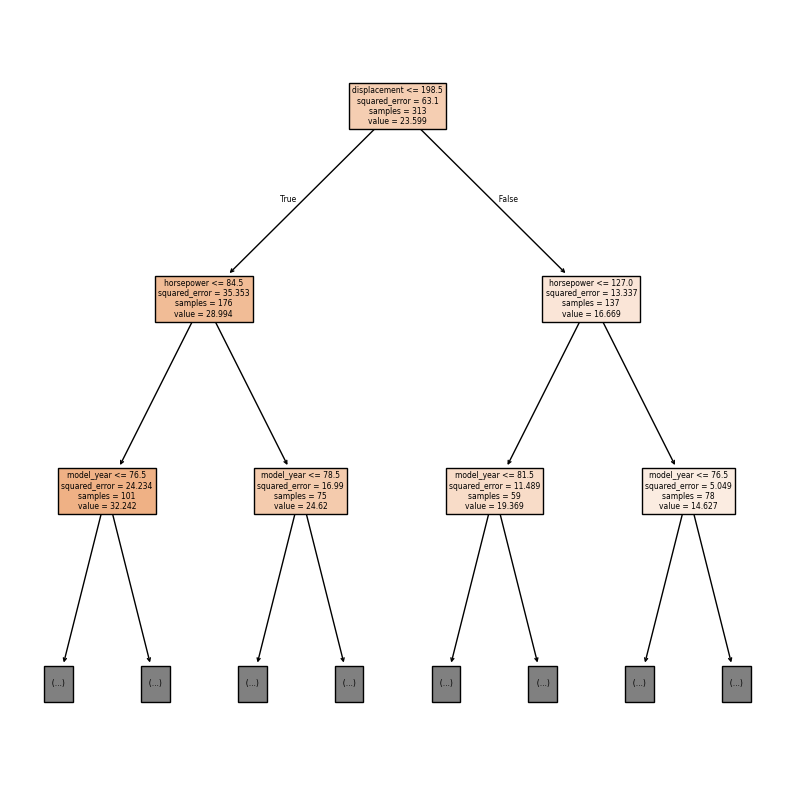

In [144]:
plt.figure(figsize = (10,10))

plot_tree(modelDTR, filled = True,
          feature_names=X_train.columns, max_depth=2 )

plt.show()

---
---

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [145]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [146]:
# Exercice 1
# INSERT CODE HERE
data.dropna(inplace=True)
print(data.species.unique())
print(data.island.unique())

data['species'] = data.species.apply(lambda x: 0 if x.lower()== 'adelie' else 1 if x.lower()=='chinstrap' else 2)

data['island'] = data.island.apply(lambda x: 0 if x.lower()== 'torgersen' else 1 if x.lower()=='biscoe' else 2)

data

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


---

# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [147]:
# Exercice 2
# INSERT CODE HERE
columns = list(data.columns.values)
columns.remove('sex')

X = data[columns]
y = data['sex']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

---

# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [148]:
# Exercice 3
# INSERT CODE HERE
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier()

---

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [149]:
# Exercice 4
# INSERT CODE HERE
y_predict = modelDTC.predict(X_test)
df_result = pd.DataFrame({'real': y_test, 'predict': y_predict})
df_result

,real,predict
30,Female,Female
317,Female,Female
79,Male,Male
201,Female,Male
63,Male,Male
...,...,...
288,Female,Female
4,Female,Female
83,Male,Female
319,Male,Male


---

# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [150]:
# Exercice 5
# INSERT CODE HERE
accuracy_score(y_test, y_predict)

0.8507462686567164

---

# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [151]:
# Exercice 6
# INSERT CODE HERE
df_features_importance = pd.DataFrame({'columns':modelDTC.feature_names_in_, 'importance %': (modelDTC.feature_importances_*100).round(2)})

df_features_importance

,columns,importance %
0,species,0.00
1,island,1.76
2,bill_length_mm,7.95
3,bill_depth_mm,49.36
4,flipper_length_mm,3.36
5,body_mass_g,37.57


---

# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

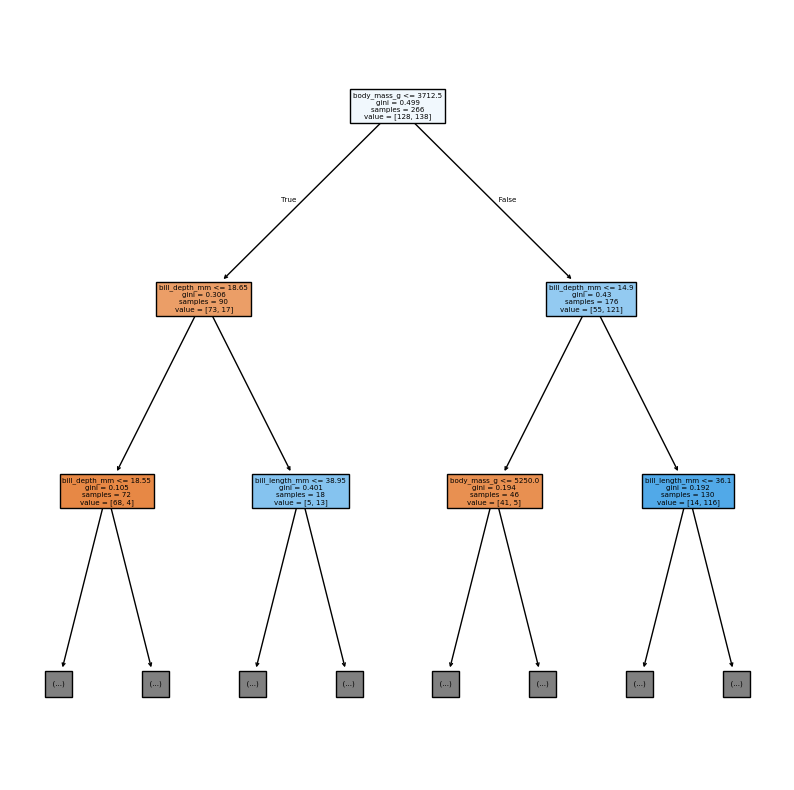

In [152]:
# Exercice 7
# INSERT CODE HERE
plt.figure(figsize = (10,10))

plot_tree(modelDTC, filled = True,
          feature_names=X_train.columns, max_depth=2 )

plt.show()

---

# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [153]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

for i in range(1, 11):
    modelDTC = DecisionTreeClassifier(max_depth=i)
    modelDTC.fit(X_train, y_train)
    y_train_predict = modelDTC.predict(X_train)
    y_test_predict = modelDTC.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)

    list_of_accuracies_train.append(train_accuracy)
    list_of_accuracies_test.append(test_accuracy)

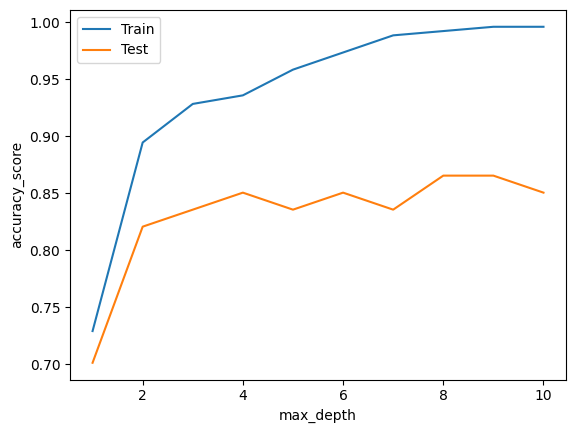

In [154]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
plt.plot(np.arange(1, 11), list_of_accuracies_train)
plt.plot(np.arange(1, 11), list_of_accuracies_test)
plt.legend(['Train', 'Test'])
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.show()